In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB-/cluster_5_5324.BMP
/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB-/cluster_5_3382.BMP
/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB-/cluster_5_1398.BMP
/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB-/cluster_5_1142.BMP
/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB-/cluster_5_5002.BMP
/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB-/cluster_5_2646.BMP
/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB-/cluster_5_3476.BMP
/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB-/cluster_5_1613.BMP
/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB-/cluster_5_5593.BMP
/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB-/cluster_5_2975.BMP
/kaggle/input/finger-print-based-blood-g

In [3]:
import os
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report

2025-07-11 04:39:12.749630: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752208753.016617      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752208753.095584      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
file_path = '/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group'

# List all classes in the dataset
name_class = os.listdir(file_path)
print(name_class)

['AB-', 'O+', 'B-', 'B+', 'A-', 'A+', 'O-', 'AB+']


In [5]:
# Get file paths for all images in the dataset
filepaths = list(glob.glob(file_path + '/**/*.*'))

# Example of printing a subset of file paths
print(filepaths[-6:-1])

# Extract labels from file paths
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
print(labels)

['/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB+/cluster_4_1030.BMP', '/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB+/cluster_4_2965.BMP', '/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB+/cluster_4_1480.BMP', '/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB+/cluster_4_4537.BMP', '/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB+/cluster_4_4220.BMP']
['AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-', 'AB-',

                                            Filepath Label
0  /kaggle/input/finger-print-based-blood-group-d...    B-
1  /kaggle/input/finger-print-based-blood-group-d...    B+
2  /kaggle/input/finger-print-based-blood-group-d...    A-
3  /kaggle/input/finger-print-based-blood-group-d...    O+
4  /kaggle/input/finger-print-based-blood-group-d...    B-


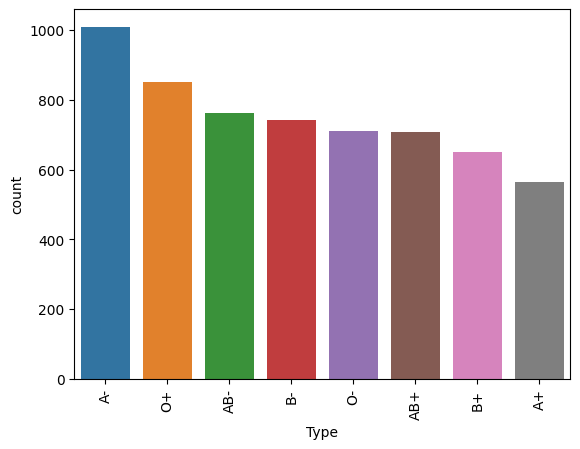

In [6]:
# Create a DataFrame with file paths and labels
filepath = pd.Series(filepaths, name='Filepath').astype(str)
Labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, Labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
print(data.head(5))

# Visualize class distribution
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90)
plt.show()

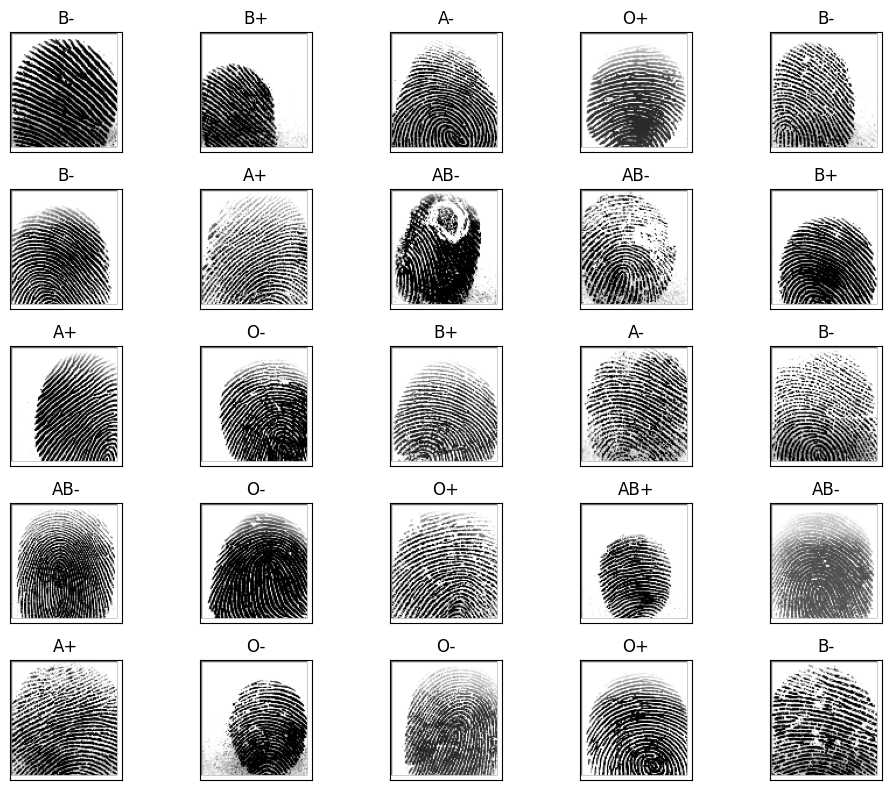

In [7]:
# Split data into training and testing sets
train, test = train_test_split(data, test_size=0.20, random_state=42)

# Visualize some images from the dataset
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 8), subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [8]:
# Set up ImageDataGenerator for training and validation data
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(256, 256),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)

valid_gen = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(256, 256),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)

Found 4800 validated image filenames belonging to 8 classes.
Found 1200 validated image filenames belonging to 8 classes.


In [9]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Step 1: Load the pre-trained ResNet50 model
pretrained_model = ResNet50(
    input_shape=(256, 256, 3),
    include_top=False,
    weights='/kaggle/input/resnet50-weights-h5/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5',
    pooling='avg'
)

# Step 2: Freeze all layers initially
pretrained_model.trainable = False

# Step 3: Add classification layers
x = Dense(128, activation="relu")(pretrained_model.output)
x = Dense(128, activation="relu")(x)
outputs = Dense(8, activation='softmax')(x)

model = Model(inputs=pretrained_model.input, outputs=outputs)

# Step 4: Compile the model
model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Step 5: Initial training with frozen base
history_initial = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=10,  # Train initially for fewer epochs
)

# Step 6: Unfreeze some layers in ResNet50 (fine-tuning)
# Unfreeze from a specific layer (e.g., from layer 140 onwards)
for layer in pretrained_model.layers[140:]:
    layer.trainable = True

# Recompile with a lower learning rate
model.compile(
    optimizer=Adam(learning_rate=1e-5),  # Lower LR for fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Step 7: Continue training (fine-tuning)
history_finetune = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=10,  # Fine-tune for a few more epochs
)


2025-07-11 04:39:35.962648: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 794s 5s/step - accuracy: 0.4153 - loss: 1.5212 - val_accuracy: 0.6767 - val_loss: 0.8499
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 774s 5s/step - accuracy: 0.6841 - loss: 0.8036 - val_accuracy: 0.7233 - val_loss: 0.6915
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 725s 5s/step - accuracy: 0.7434 - loss: 0.6473 - val_accuracy: 0.7533 - val_loss: 0.6379
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 731s 5s/step - accuracy: 0.7992 - loss: 0.5303 - val_accuracy: 0.7458 - val_loss: 0.6519
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 714s 5s/step - accuracy: 0.8163 - loss: 0.4755 - val_accuracy: 0.7575 - val_loss: 0.5992
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 716s 5s/step - accuracy: 0.8327 - loss: 0.4128 - val_accuracy: 0.7700 - val_loss: 0.5667
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 714s 5s/step - accuracy: 0.8499 - loss: 0.3763 - val_accuracy: 0.7492 - val_loss: 0.6329
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 714s 5s/step - accuracy: 0.8527 - loss: 0.3805 - val_accu

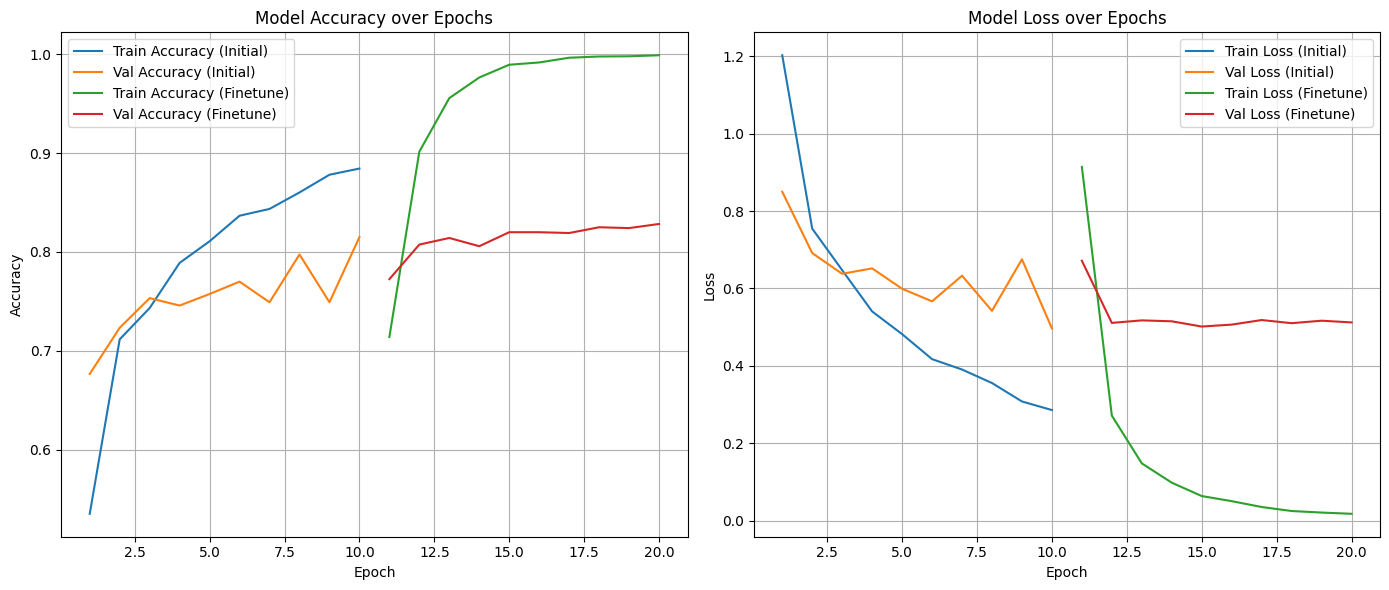

Test Loss: 0.51221
Test Accuracy: 82.83%
38/38 ━━━━━━━━━━━━━━━━━━━━ 149s 4s/step
              precision    recall  f1-score   support

          A+       0.89      0.89      0.89       117
          A-       0.86      0.77      0.81       219
         AB+       0.84      0.78      0.81       147
         AB-       0.83      0.84      0.84       167
          B+       0.82      0.84      0.83       126
          B-       0.84      0.94      0.89       148
          O+       0.80      0.81      0.80       159
          O-       0.74      0.80      0.77       117

    accuracy                           0.83      1200
   macro avg       0.83      0.83      0.83      1200
weighted avg       0.83      0.83      0.83      1200



In [13]:
import pandas as pd

# Plot training history
epochs_initial = list(range(1, 11))
epochs_finetune = list(range(11, 21))

plt.figure(figsize=(14, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(epochs_initial, history_initial.history["accuracy"], label='Train Accuracy (Initial)')
plt.plot(epochs_initial, history_initial.history["val_accuracy"], label='Val Accuracy (Initial)')
plt.plot(epochs_finetune, history_finetune.history["accuracy"], label='Train Accuracy (Finetune)')
plt.plot(epochs_finetune, history_finetune.history["val_accuracy"], label='Val Accuracy (Finetune)')
plt.title("Model Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(epochs_initial, history_initial.history["loss"], label='Train Loss (Initial)')
plt.plot(epochs_initial, history_initial.history["val_loss"], label='Val Loss (Initial)')
plt.plot(epochs_finetune, history_finetune.history["loss"], label='Train Loss (Finetune)')
plt.plot(epochs_finetune, history_finetune.history["val_loss"], label='Val Loss (Finetune)')
plt.title("Model Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Evaluate the model on test data
results = model.evaluate(valid_gen, verbose=0)
print(f"Test Loss: {results[0]:.5f}")
print(f"Test Accuracy: {results[1]*100:.2f}%")

# Predict labels for test data
pred = model.predict(valid_gen)
pred = np.argmax(pred, axis=1)

# Map predicted labels
labels = train_gen.class_indices
labels = dict((v, k) for k, v in labels.items())
pred = [labels[k] for k in pred]

# Compare predicted labels with true labels and print classification report
y_test = list(test.Label)
print(classification_report(y_test, pred))

In [18]:
model.save("model_blood_group_detection.h5")

In [19]:
train_gen.class_indices

{'A+': 0, 'A-': 1, 'AB+': 2, 'AB-': 3, 'B+': 4, 'B-': 5, 'O+': 6, 'O-': 7}

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


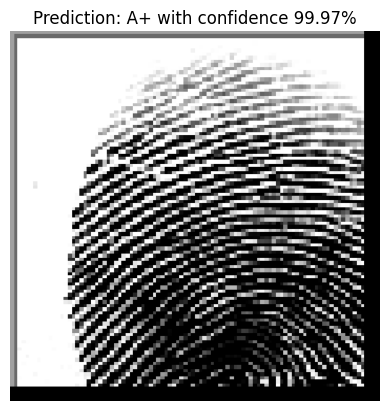

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input

# Load the pre-trained model
model = load_model('/kaggle/working/model_blood_group_detection.h5')
"""
# Path to the folder containing multiple images
image_folder = '/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/A-'

# Class labels (update as per your model training)
labels = ['A+', 'A-', 'B+', 'B-', 'AB+', 'AB-', 'O+', 'O-']

# Get list of image file paths in the folder
image_paths = [os.path.join(image_folder, fname) for fname in os.listdir(image_folder)
               if fname.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]

# Loop through and predict each image
for img_path in image_paths:
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    result = model.predict(x)
    predicted_class = np.argmax(result)
    predicted_label = labels[predicted_class]
    confidence = result[0][predicted_class] * 100

    # Display the image and prediction
    plt.imshow(image.array_to_img(img))
    plt.axis('off')
    plt.title(f"Prediction: {predicted_label} ({confidence:.2f}%)")
    plt.show()"""
# Class labels (update as per your model training)
labels = ['A+', 'A-', 'B+', 'B-', 'AB+', 'AB-', 'O+', 'O-']

# Example of loading a single image and making a prediction
img_path = '/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/A+/cluster_0_1001.BMP'

img = image.load_img(img_path, target_size=(256, 256))  # Load the image
x = image.img_to_array(img)  # Convert image to array
x = np.expand_dims(x, axis=0)  # Expand dimensions to match the model input
x = preprocess_input(x)  # Preprocess the image

result = model.predict(x)  # Predict using the model
predicted_class = np.argmax(result)  # Get the predicted class index

# Map the predicted class to the label
predicted_label = labels[predicted_class]
confidence = result[0][predicted_class] * 100  # Confidence level

# Display the image
plt.imshow(image.array_to_img(image.img_to_array(img) / 255.0))
plt.axis('off')  # Hide axes

# Display the prediction and confidence below the image
plt.title(f"Prediction: {predicted_label} with confidence {confidence:.2f}%")
plt.show()
